**Hypothesis Testing using T-test**

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [ ]:
approach1_scores = [80,77,87,88,78]

In [ ]:
approach2_scores = [90,88,92,95,84]

In [ ]:
data = pd.DataFrame()
data['Marks with approach 1'] = approach1_scores
data['Marks with approach 2'] = approach2_scores

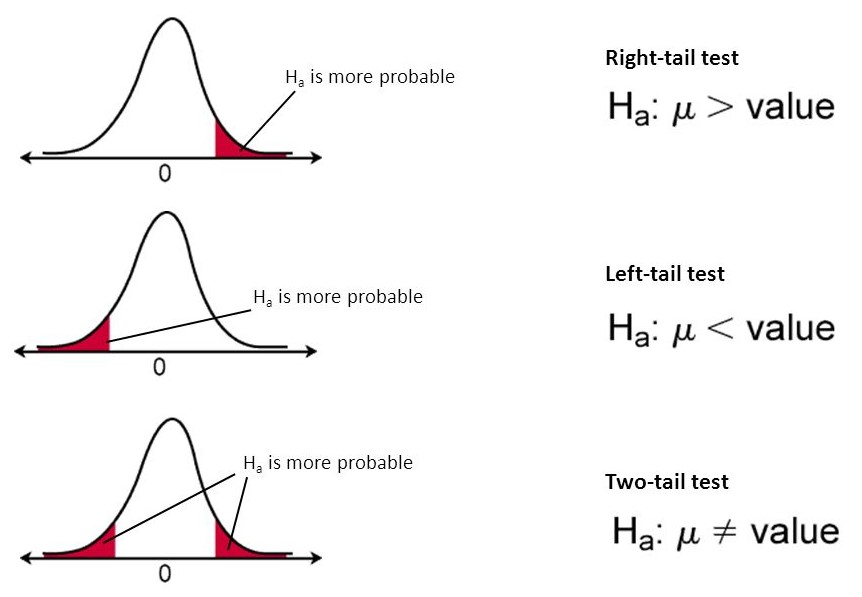

In [ ]:
t_statistic, p_value = stats.ttest_ind(data['Marks with approach 1'], data['Marks with approach 2'])

In [ ]:
alpha = 0.05

**Hypothesis**

*   Null Hypothesis: Both yeilded same results
*   Alternate Hypothesis: Both yeilded different results


In [ ]:
# Print the results
print("Approach 1 Scores Mean:", np.mean(approach1_scores))
print("Approach 2 Scores Mean:", np.mean(approach2_scores))
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

if p_value < alpha:
    print("Null hypothesis rejected: Approach 1 and Approach 2 have different effects.")
else:
    print("Null hypothesis not rejected: There is no significant difference between Approach 1 and Approach 2.")

Approach 1 Scores Mean: 82.0
Approach 2 Scores Mean: 89.8
T-Statistic: -2.6383893568177785
P-Value: 0.029787705353264794
Null hypothesis rejected: Approach 1 and Approach 2 have different effects.


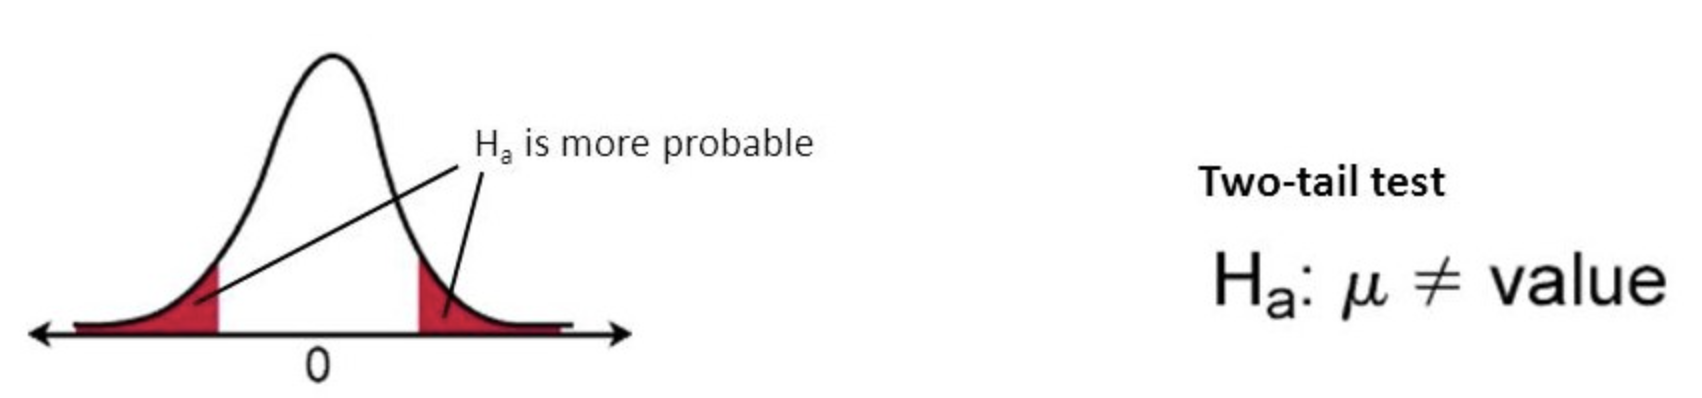

In [ ]:
# Perform a left-tailed t-test (Testing if Approach 1 is worse)
t_stat_left_tailed, p_value_left_tailed = stats.ttest_ind(approach1_scores, approach2_scores, alternative="less")

# Print the results
print("Left-Tailed Test (Approach 1 is worse):")
print(f"t-statistic: {t_stat_left_tailed}")
print(f"p-value: {p_value_left_tailed}")

# Decide whether to reject the null hypothesis based on the p-value
alpha = 0.05  # Set the significance level
if p_value_left_tailed < alpha:
    print("Reject the null hypothesis (Approach 1 is worse).")
else:
    print("Fail to reject the null hypothesis (No evidence that Approach 1 is worse).")


Left-Tailed Test (Approach 1 is worse):
t-statistic: -2.6383893568177785
p-value: 0.014893852676632397
Reject the null hypothesis (Approach 1 is worse).


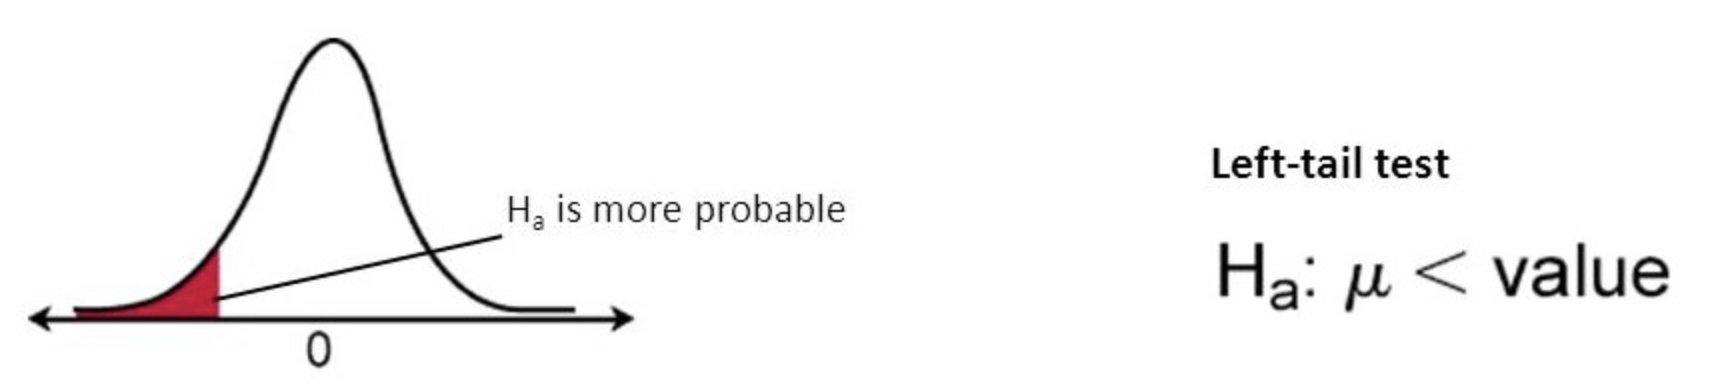

In [ ]:
# Perform a right-tailed t-test (Testing if Approach 1 is better)
t_stat_right_tailed, p_value_right_tailed = stats.ttest_ind(approach1_scores, approach2_scores, alternative="greater")

# Print the results
print("Right-Tailed Test (Approach 1 is better):")
print(f"t-statistic: {t_stat_right_tailed}")
print(f"p-value: {p_value_right_tailed}")

# Decide whether to reject the null hypothesis based on the p-value
alpha = 0.05  # Set the significance level
if p_value_right_tailed < alpha:
    print("Reject the null hypothesis (Approach 1 is better).")
else:
    print("Fail to reject the null hypothesis (No evidence that Approach 1 is better).")


Right-Tailed Test (Approach 1 is better):
t-statistic: -2.6383893568177785
p-value: 0.9851061473233675
Fail to reject the null hypothesis (No evidence that Approach 1 is better).


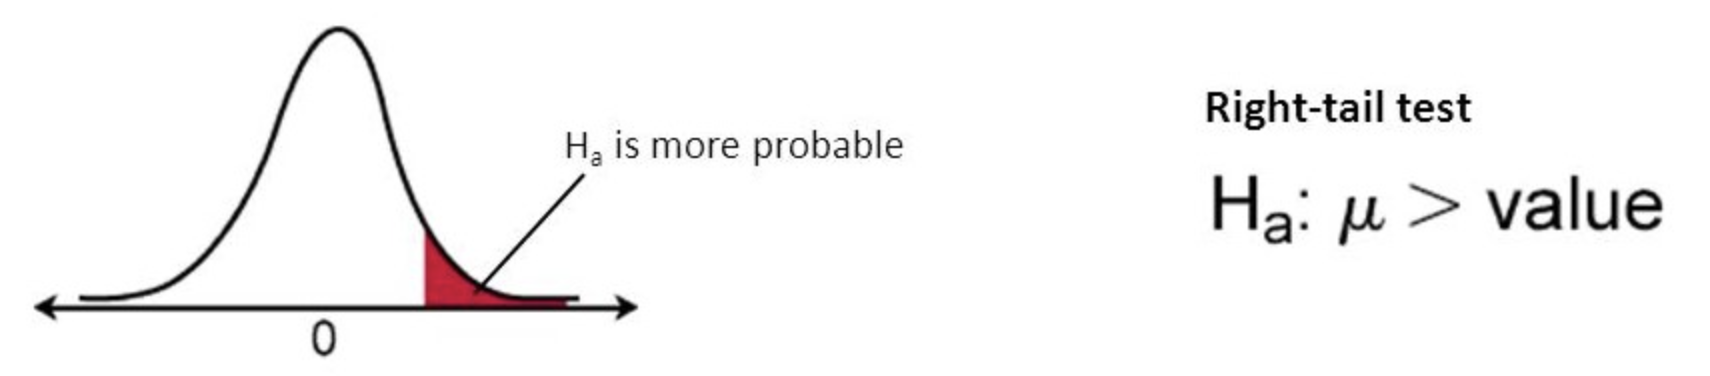

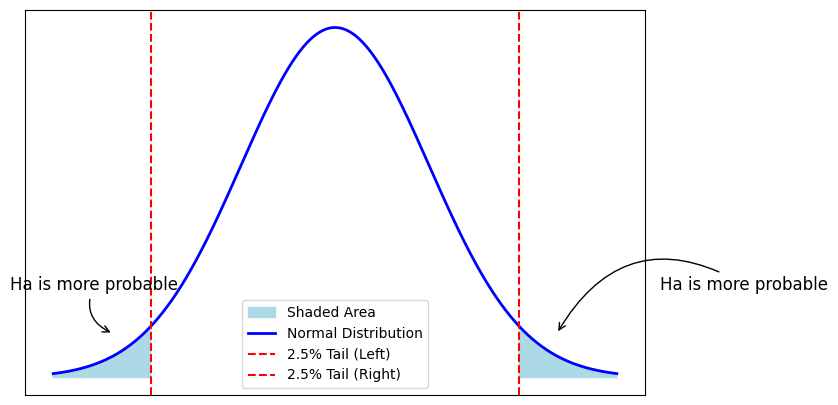

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the parameters of the normal distribution
mean = 0  # Mean (center) of the distribution
std_dev = 1  # Standard deviation (spread or width) of the distribution

# Generate a range of x values
x = np.linspace(mean - 3 * std_dev, mean + 3 * std_dev, 1000)

# Calculate the probability density function (PDF) for the normal distribution
pdf = norm.pdf(x, loc=mean, scale=std_dev)

# Create a plot
plt.figure(figsize=(8, 5))

# Color the area to the left of the left red line and to the right of the right red line
plt.fill_between(x, 0, pdf, where=(x < left_critical_value) | (x > right_critical_value), color='lightblue', label='Shaded Area')

# Calculate the x-values for the red lines at the 2.5% tails
left_critical_value = norm.ppf(0.025, loc=mean, scale=std_dev)
right_critical_value = norm.ppf(0.975, loc=mean, scale=std_dev)

# Add the normal distribution curve
plt.plot(x, pdf, color='blue', linewidth=2, label='Normal Distribution')

# Add red lines
plt.axvline(left_critical_value, color='red', linestyle='--', label='2.5% Tail (Left)')
plt.axvline(right_critical_value, color='red', linestyle='--', label='2.5% Tail (Right)')

# Add text labels with arrows
plt.annotate('Ha is more probable', xy=(right_critical_value + 0.4, 0.05), xytext=(right_critical_value + 1.5, 0.1),
             arrowprops=dict(arrowstyle='->', lw=1, connectionstyle='arc3,rad=0.5'), fontsize=12)

plt.annotate('Ha is more probable', xy=(left_critical_value - 0.4, 0.05), xytext=(left_critical_value - 1.5, 0.1),
             arrowprops=dict(arrowstyle='->', lw=1, connectionstyle='arc3,rad=0.5'), fontsize=12)

# Remove x-axis and y-axis labels
plt.xticks([])
plt.yticks([])

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
